This notebook contains maps of model outputs vs true outcomes. See `census_precinct_data.ipynb` for maps of input features.

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.errors import ShapelyDeprecationWarning
import warnings
plt.rcParams['figure.figsize'] = [12, 12]  # add more space to figures

In [5]:
vtds = gpd.read_file('geo/MI_VTDs_2020/MI_VTDs_2020.shp')
vtds = vtds.dissolve(by="GEOID20").reset_index()  # combine VTD areas that have same name
vtds = vtds.rename(columns={"GEOID20":"VTD_ID"})  # rename identifying column for simplicity
vtds["VTD_ID"] = vtds.VTD_ID.astype(str)  # convert to string
vtds = vtds[["VTD_ID","geometry"]]
vtds

,VTD_ID,geometry
0,26001001001,"POLYGON ((-83.64576 44.77049, -83.64541 44.771..."
1,26001001002,"POLYGON ((-83.76779 44.77279, -83.76777 44.774..."
2,26001001003,"POLYGON ((-83.88742 44.59538, -83.88665 44.595..."
3,26001001004,"POLYGON ((-83.40228 44.59806, -83.40025 44.598..."
4,26001001005,"POLYGON ((-83.52528 44.68394, -83.52456 44.684..."
...,...,...
4800,26165165017,"POLYGON ((-85.58029 44.33749, -85.58027 44.338..."
4801,26165165018,"POLYGON ((-85.82127 44.27858, -85.82121 44.280..."
4802,26165165019,"POLYGON ((-85.82145 44.22325, -85.82137 44.228..."
4803,26165165020,"POLYGON ((-85.82086 44.35248, -85.82082 44.360..."


In [2]:
def simple_map(data,boundary=True,variable=None,title=None):
    
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
        # For some reason, below line prints deprecation warning for some but not all geometries
        # ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0.
        if variable is not None:
            fig = data.plot(column=variable,legend=True)
            if title is None:
                title = variable
        elif boundary:
            fig = data.boundary.plot()
        else:
            fig = data.plot()
        if title is not None:
            plt.title(title)
        return fig

def simple_choropleth(data,variable,title=None):
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
        # For some reason, below line prints deprecation warning for some but not all geometries
        # (for example, for community_areas but not for tracts)
        # ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0.
        data.plot(column=variable,legend=True)
        if title is None:
            title = variable
        plt.title(title)
        plt.show()

In [13]:
data = pd.read_csv('data/mi_matched_precinct.csv')
data["VTD_ID"] = data.VTD_ID.astype(str)  # convert to string
data

,NAME20,VTD_ID,total_pop,pop_density,prop_white,prop_Black,prop_Hispanic,prop_AIA,prop_Asian,prop_married,...,R_pct_vote,D_recipient_cfscore,I_recipient_cfscore,R_recipient_cfscore,D_cf_category,D_cf_label,I_cf_category,I_cf_label,R_cf_category,R_cf_label
0,10104000001,26001001001,1199.706208,0.000020,0.976484,0.001091,0.007787,0.003980,0.003651,0.586734,...,0.677225,-1.474,NaN,1.086,-3.0,Very Liberal,NaN,NaN,3.0,Very Conservative
1,11246000001,26001001002,888.447426,0.000014,0.974214,0.000000,0.007050,0.003035,0.004946,0.544382,...,0.685764,-1.474,NaN,1.086,-3.0,Very Liberal,NaN,NaN,3.0,Very Conservative
2,11932000001,26001001003,732.583185,0.000008,0.948043,0.000000,0.018285,0.024794,0.008878,0.427789,...,0.649466,-1.474,NaN,1.086,-3.0,Very Liberal,NaN,NaN,3.0,Very Conservative
3,13482000001,26001001004,1234.485189,0.000060,0.969429,0.010086,0.003118,0.005656,0.008460,0.521359,...,0.640000,-1.474,NaN,1.086,-3.0,Very Liberal,NaN,NaN,3.0,Very Conservative
4,13574000001,26001001005,746.017711,0.000030,0.958360,0.001958,0.016015,0.011473,0.000809,0.410391,...,0.725166,-1.474,NaN,1.086,-3.0,Very Liberal,NaN,NaN,3.0,Very Conservative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,1636508000008,26163163816,2254.373896,0.000600,0.782618,0.038776,0.058316,0.017743,0.102547,0.667799,...,0.495210,-1.376,0.5325,1.018,-3.0,Very Liberal,2.0,Strong Conservative,3.0,Very Conservative
1038,1636508000009,26163163817,2412.939006,0.000807,0.858341,0.020712,0.026011,0.020645,0.079797,0.541736,...,0.471647,-1.376,0.5325,1.018,-3.0,Very Liberal,2.0,Strong Conservative,3.0,Very Conservative
1039,1636508000010,26163163818,2638.708464,0.001235,0.828207,0.003732,0.052125,0.003860,0.113106,0.753307,...,0.560597,-1.376,0.5325,1.018,-3.0,Very Liberal,2.0,Strong Conservative,3.0,Very Conservative
1040,1636508000011,26163163819,2455.000000,0.000655,0.907536,0.026884,0.000000,0.000000,0.065580,0.847747,...,0.558971,-1.376,0.5325,1.018,-3.0,Very Liberal,2.0,Strong Conservative,3.0,Very Conservative


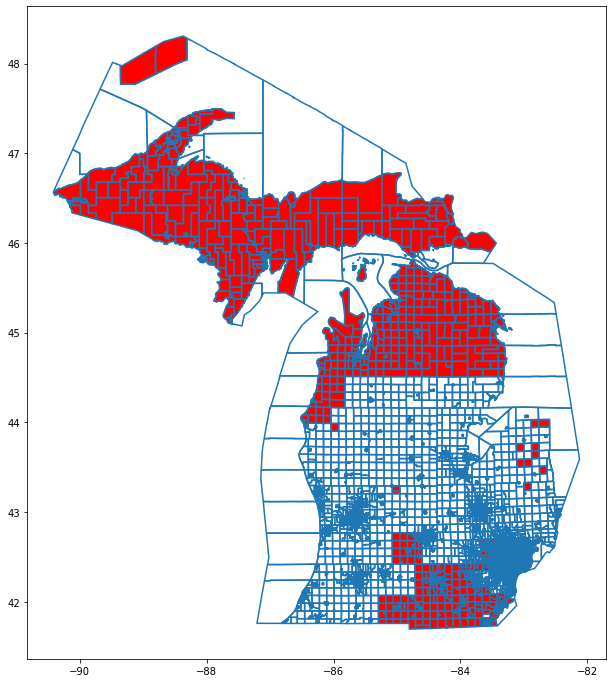

In [6]:
fig, ax = plt.subplots()
vtds.boundary.plot(ax=ax)
pd.merge(vtds,data,on='VTD_ID').plot(color='red',ax=ax)
plt.show()